In [39]:
from datascience import *
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 33

In [40]:
def standard_units(arr):
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def get_fitted_values(t, x, y):
    """Return an array of the regression estimates at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

def get_residuals(t, x, y):
    predictions = get_fitted_values(t, x, y)
    return t.column(y) - predictions

## Review: Root Mean Square Error

In [41]:
# load demographic data 
demographics = Table.read_table('district_demographics2016.csv')
demographics = demographics.select('College%', 'Median Income')
demographics.show(5)

College%,Median Income
24,47083
21.8,42035
22.8,46544
17,41110
30.3,51690


In [42]:
# Calculate the root mean squared error (RMSE) for the actual residuals
RMSE = np.mean(get_residuals(demographics, "College%", "Median Income") ** 2) ** 0.5
RMSE

9398.515588571281

In [43]:
# function to calculate the RMSE for any splot and intercept for the demographic data
def demographics_rmse(any_slope, any_intercept):
    x = demographics.column('College%')
    y = demographics.column('Median Income')
    estimate = any_slope*x + any_intercept
    return (np.mean((y - estimate) ** 2)) ** 0.5

In [44]:
# show the demographic plot and the RMSE for an arbitrary slope and intercept

example_slope = 1500          #  -1000     500
example_intercept = 2000      #  75000     20000

demographics_rmse(example_slope, example_intercept)

15215.693729090082

## Review: Numerical Optimization

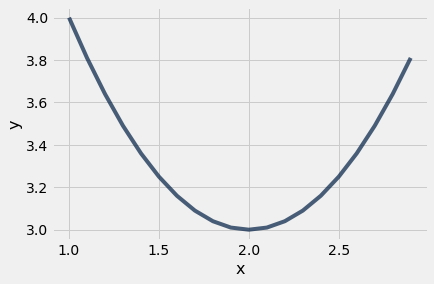

In [45]:
# An arbitrary function 
def f(x):
    return ((x-2)**2) + 3

# plot the function
x = np.arange(1, 3, 0.1)
y = f(x)
Table().with_columns('x', x, 'y', y).plot('x')

In [46]:
# find the minimum value of the function 
minimize(f)

1.9999999946252267

In [47]:
# RMSE for arbitrary slope and intercept
demographics_rmse(1500, 20000)

11559.086490075999

In [48]:
# Minimize the demographic RMSE
minimize(demographics_rmse)

array([ 1270.70168805, 20802.57933807])

What is the regression equation for predicting a county's median income based on the percentage of the population that went to college? 

Answer:

$$
\hat{y} ~ = ~ 1270.7 \cdot x ~ + ~ 20802.6
$$


## Regression diagnostic plots

In [49]:
galton = Table.read_table('galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )

In [50]:
# A function that creates two plots: 
# 1) A scatter plot of the data and the fitted values
# 2) A plot of the residuals as a function of the fitted values
def plot_residuals(t, x, y):
    tbl = t.with_columns(
        'Predicted', get_fitted_values(t, x, y),
        'Residual', get_residuals(t, x, y)
    )
    tbl.select(x, y, 'Predicted').scatter(0)
    tbl.scatter(x, 'Residual')

In [82]:
# Let's apply the function to the Galton data


### US women heights and average weights

In [52]:
# Height and average weight of US women
us_women = Table.read_table('us_women.csv')
us_women.show(5)

height,ave weight
58,115
59,117
60,120
61,123
62,126


In [83]:
# correlation of height and weight


In [84]:
# create the residual plots


## Polynomial regression

**Quadratic Function**

$$
f(x) ~=~ ax^2 + bx + c
$$
for constants $a$, $b$, and $c$.

In [55]:
# A function that returns the RMSE for a quadratic fit to the us women data
def us_women_quadratic_rmse(a, b, c):
    ...
    

In [56]:
# get the quadratic fit coefficients



Can you fill in the coefficients in the prediction equation? 

$$
f(x) ~=~ ...
$$

In [57]:
# What is the predicted average weight for someone who is 65 inches?


In [58]:
# get the fitted values for quadratic




In [59]:
# plot the fitted values for the quadratic predictions


In [60]:
# calculate the residuals



In [61]:
# plot the residuals




In [62]:
# Are higher order terms needed???
# Try a degree 5 polynomial at home!






## Regression and correlation relationships

No matter what the shape of the scatter plot, the SD of the fitted values is a fraction of the SD of the observed values of $y$. When the least squares regression line is used, the fraction is |r|.

$$
\frac{\mbox{SD of fitted values}}{\mbox{SD of }y} ~=~ |r| ~~~~~~~~~~ \mbox{That is,} ~~ \mbox{SD of fitted values} = |r|\cdot \mbox{SD of }y
$$

In [63]:
# load data on fruits
fruit = Table.read_table('fruit_baskets.csv')
fruit.show(3)

Bananas,Clementines,Weight
9,19,7.91585
4,25,6.69871
5,26,7.3679


In [64]:
# create a scatter plot visualizing the weight of fruits as a function fo the number of clementines


Let's show that:

$$
\frac{\mbox{SD of fitted values}}{\mbox{SD of }y} ~=~ |r|
$$

In [65]:
# Get the standard deviation of our y variable (Weight)



In [66]:
# Get the standard deviation of the fitted values (from predicting weight from the number of clementines)



In [67]:
# calculate standard deviation of the residuals over the total standard deviation of weights


In [68]:
# Note this matches the correlation value



Let's show that:

$$
(\text{SD y})^2 ~ = ~ (\text{residuals})^2 ~ + ~ (\text{SD fitted values})^2
$$

In [69]:
# Get the standard deviation of the residuals (from predicting weight from the number of clementines)



In [70]:
# Let's calculate the variance of the fitted values 


In [71]:
# Let's calculate the variance of y


## Regression Model 

Let's examine the relationship between:

- True regression line that captures the linear relationship between two variables (green line)
- A random sample of n points that come from the underlying linear relationship plus random noise off the regression line
- A line fit to the sample of points that approximates the true regression line (i.e., the "line best fit" shown in blue)

To do this we will use the function `draw_and_compare` defined below that takes three arguments:

1. The true slope of a linear relationship between our variables
2. The true y-intercept of a linear relationship between our variables
3. A sample size (n) of random points that will be used to calculate the "line of best fit"



In [72]:
def draw_and_compare(true_slope, true_int, sample_size):
    
    x = np.random.normal(50, 5, sample_size)
    xlims = np.array([np.min(x), np.max(x)])
    errors = np.random.normal(0, 6, sample_size)
    y = (true_slope * x + true_int) + errors
    sample = Table().with_columns('x', x, 'y', y)

    sample.scatter('x', 'y')
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title('True Line, and Points Created')

    sample.scatter('x', 'y')
    plots.title('What We Get to See')

    sample.scatter('x', 'y', fit_line=True)
    plots.title('Regression Line: Estimate of True Line')

    sample.scatter('x', 'y', fit_line=True)
    plots.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plots.title("Regression Line and True Line")

In [73]:
# have a true slope of 2, an true intercept of -5 and draw 10 random points


In [74]:
# have a true slope of 2, an true intercept of -5 and draw 100 random points


## Bootstrap slopes, intercepts and regression lines

In [75]:
# take a random sample (with replacement) from our original fruit sample and fit a regression line



In [76]:
# create a bootstrap distribution for the slope and intercept







In [77]:
# visualize all the bootstrap lines







In [78]:
# create a 95% confidence interval for the regression slope



In [79]:
# visualize the bootstrap distribution





# Question:
#  Is a slope of 0 plausible?  
#  i.e, no linear association between the number of Clementines and Weight?


### Question: could you run a hypothesis test assessing whether the regression slope is 0? 

In [80]:
# create a null distribution 





In [81]:
# visualize the null distribution and compare it to slope calculated on the real data


